<a href="https://colab.research.google.com/github/YanaGlad/Numerical-Methods/blob/master/kursovaya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

Считывание данных из файла

In [102]:
temp = set()

with open("test.txt", "r") as file:
    for line in file:
        temp.add(int(line))
numbers = list(temp)

In [103]:
# Вывод длины массива чисел, в котором ведется поиск
len(numbers)

8

In [104]:
numbers

[1, 2, 6, 7, 9, 11, -3, -1]

Создание хеш-таблицы

In [105]:
hash_table = dict()

for i in range(len(numbers)):
     hash_table[numbers[i]] = i

In [106]:
hash_table

{1: 0, 2: 1, 6: 2, 7: 3, 9: 4, 11: 5, -3: 6, -1: 7}

Функция бинарного поиска целевого значения target в отсортированном массиве

In [107]:
def binary_search(lst, target):
    low = 0
    high = len(lst)
    # цикл поиска целевого значения target с учетом значений левого и правого индексов массива
    while low <= high:
        mid = (low + high) //2
        if low >= mid:
            return None
        # проверка: найдено ли целевое значение
        if lst[mid] == target: # если целевое значение target найдено
            return mid # возвращаем индекс найденного целевого значения
        # если целевое значение target не найдено, меняем границы поиска
        elif lst[mid] > target:
            high = mid # верхняя граница становится mid
        else:
            low = mid # нижняя граница становится mid
    return None

Функция бинарного поиска 2 чисел, дающих в сумме целевое значение total

In [108]:
def two_sum_binary_search(arr, total):
    for i in range(len(arr)): # поиск в цикле по отсортированному массиву
        num = total - arr[i]
        num_idx = binary_search(arr, num) # вызов функции binary_search
        if num_idx is not None:  
            if num_idx != i:
                return (i, num_idx)
    return None

Функция поиска 2 чисел, дающих в сумме целевое значение total, с использованием хэш-таблицы

In [109]:
def two_sum_hash_table(arr, total):
    for i in range(len(arr)):
        num = total - arr[i]
        if (num in hash_table) and (hash_table[num] != i):
            return i, hash_table[num]
    return None

Общая функция для решения задачи

In [110]:
def task(findSum, start, end):
  t = start
  total = 0
  while t <= end:
     res = findSum(arr, t)
     if res != None:
         total+=1
     t+=1
  return total

Решение задачи через бинарный поиск

In [111]:
t = time.time()
arr = sorted(numbers) # сортировка массива
t0 = time.time()- t
print('Время сортировки массива: ', t0)

Время сортировки массива:  9.512901306152344e-05


In [112]:
t = time.time()
print('Число найденных решений: ', task(two_sum_binary_search, 3, 10))
t_t_1 = time.time()- t
print('Время бинарного поиска: ', t_t_1)

Число найденных решений:  8
Время бинарного поиска:  0.00029349327087402344


Решение задачи через хэш-таблицы

In [113]:
arr = numbers # несортированный массив
t = time.time()
print('Число найденных решений: ',task(two_sum_hash_table, 3, 10))
t_t_2 = time.time()- t
print('Время поиска с использованием хэш-таблицы: ',t_t_2)

Число найденных решений:  8
Время поиска с использованием хэш-таблицы:  0.00027632713317871094


Столбчатые диаграммы по времени поиска

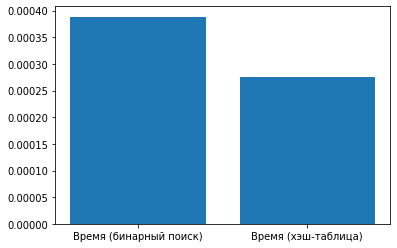

In [114]:
x = np.arange(1, 3)
y = [t_t_1 + t0, t_t_2]
keys=['Время (бинарный поиск)', 'Время (хэш-таблица)']
plt.bar(x,y,tick_label=keys)
plt.show()